In [11]:
#%matplotlib notebook

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import gmaps
from scipy.stats import linregress
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

# Import API key
#from api_keys import api_key
from api_keys import g_key



In [83]:
# API responses for all sensor  at May 2019, this is the base url, then we add sensor id later to create search url 
url_2019 = "https://data.melbourne.vic.gov.au/resource/b2ak-trbp.json?year=2019&month=May"
response = requests.get(url_2019).json() 

# Discover the format of the response, *please keep in mind the response is a list of dictionaries*
response

[{'id': '2653505',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '1',
  'sensor_name': 'Bourke Street Mall (North)',
  'hourly_counts': '96'},
 {'id': '2653506',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '2',
  'sensor_name': 'Bourke Street Mall (South)',
  'hourly_counts': '42'},
 {'id': '2653507',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '3',
  'sensor_name': 'Melbourne Central',
  'hourly_counts': '285'},
 {'id': '2653508',
  'date_time': '2019-05-01T00:00:00.000',
  'year': '2019',
  'month': 'May',
  'mdate': '1',
  'day': 'Wednesday',
  'time': '0',
  'sensor_id': '4',
  'sensor_name': 'Town Hall (West)',
  'hourly_counts': '147'},
 {'id': '2653509',
  'date_time': '2019-05-01

In [3]:
# create empty lists to store data
sensorID = list()
hourly_count = list()
year = list()
month = list()
date = list()
day = list()
time = list()
sensor_name = list()

In [4]:
# Access API response, be aware that the response is a list of dictionaries.  
# To this point, this script calls API for 2019 and 2020 seperately, since url doesn't support multiple queries at the same time.
# However it is possible to define a function to do the task just once. 

for i in range(1,67): # we know that there are 66 sensors in the Melbourne city 
    
    print("Processing sensor id "+ str(i) + ", " + str(i) + " of 66, May 2019")
    query_url2019 = url_2019 + "&sensor_id=" +str(i)
    response = requests.get(query_url2019).json()
    
    length = len(response) # length of the response for a particular sensor, this is for the loop
   
    # accessing each dictionary using a loop 
    for x in range(length):
        sensorID.append(response[x]["sensor_id"])
        hourly_count.append(response[x]["hourly_counts"])
        year.append(response[x]["year"])
        month.append(response[x]["month"])
        date.append(response[x]["mdate"])
        day.append(response[x]["day"])
        time.append(response[x]["time"])
        sensor_name.append(response[x]["sensor_name"])  

print("Finished processing sensors data for May 2019")        

Processing sensor id 1, 1 of 66, May 2019
Processing sensor id 2, 2 of 66, May 2019
Processing sensor id 3, 3 of 66, May 2019
Processing sensor id 4, 4 of 66, May 2019
Processing sensor id 5, 5 of 66, May 2019
Processing sensor id 6, 6 of 66, May 2019
Processing sensor id 7, 7 of 66, May 2019
Processing sensor id 8, 8 of 66, May 2019
Processing sensor id 9, 9 of 66, May 2019
Processing sensor id 10, 10 of 66, May 2019
Processing sensor id 11, 11 of 66, May 2019
Processing sensor id 12, 12 of 66, May 2019
Processing sensor id 13, 13 of 66, May 2019
Processing sensor id 14, 14 of 66, May 2019
Processing sensor id 15, 15 of 66, May 2019
Processing sensor id 16, 16 of 66, May 2019
Processing sensor id 17, 17 of 66, May 2019
Processing sensor id 18, 18 of 66, May 2019
Processing sensor id 19, 19 of 66, May 2019
Processing sensor id 20, 20 of 66, May 2019
Processing sensor id 21, 21 of 66, May 2019
Processing sensor id 22, 22 of 66, May 2019
Processing sensor id 23, 23 of 66, May 2019
Proces

In [5]:
# adding data to a dataframe 
sensor_count_data_May2019 = pd.DataFrame({
                "sensor_id" : sensorID,
                "hourly_count" : hourly_count,
                "year": year,
                "month" : month,
                "date" : date,
                "day" : day,                                 
                "time" : time,
                "sensor_name" : sensor_name                  
})

sensor_count_data_May2019.sample(100)
# hooray!

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
10160,15,815,2019,May,22,Wednesday,10,State Library
28788,46,176,2019,May,11,Saturday,14,Pelham St (South)
34753,54,14,2019,May,12,Sunday,3,Lincoln-Swanston (West)
31707,50,3,2019,May,9,Thursday,5,Faraday St-Lygon St (West)
27865,44,1,2019,May,10,Friday,3,Tin Alley-Swanston St (West)
...,...,...,...,...,...,...,...,...
17398,26,119,2019,May,14,Tuesday,0,QV Market-Elizabeth St (West)
27037,43,677,2019,May,6,Monday,15,Monash Rd-Swanston St (West)
12162,19,1010,2019,May,12,Sunday,20,Chinatown-Swanston St (North)
25363,39,98,2019,May,29,Wednesday,21,Alfred Place


In [7]:
sensor_count_data_May2019.to_csv("output/sensor_count_data_May2019.csv", index = False)

In [8]:
# Repeat above steps for May 2020, again, a function can do it with only one call
url_2020 = "https://data.melbourne.vic.gov.au/resource/b2ak-trbp.json?year=2020&month=May" # base url

# create empty lists for data  
sensorID = list()
hourly_count = list()
year = list()
month = list()
date = list()
day = list()
time = list()
sensor_name = list()


In [9]:
# Access API response, be aware that the response is a list of dictionaries.  

for i in range(1,67): # we know that there are 67 sensors in the Melbourne city 
    
    print("Processing sensor id "+ str(i) + ", " + str(i) + " of 66, May 2020")
    query_url2020 = url_2020 + "&sensor_id=" +str(i)
    response = requests.get(query_url2020).json()
    
    length = len(response) # length of the response for a particular sensor
   
    # accessing each dictionary using a loop 
    for x in range(length):
        sensorID.append(response[x]["sensor_id"])
        hourly_count.append(response[x]["hourly_counts"])
        year.append(response[x]["year"])
        month.append(response[x]["month"])
        date.append(response[x]["mdate"])
        day.append(response[x]["day"])
        time.append(response[x]["time"])
        sensor_name.append(response[x]["sensor_name"])  

print("Finished processing sensors data for May 2020")   

Processing sensor id 1, 1 of 66, May 2020
Processing sensor id 2, 2 of 66, May 2020
Processing sensor id 3, 3 of 66, May 2020
Processing sensor id 4, 4 of 66, May 2020
Processing sensor id 5, 5 of 66, May 2020
Processing sensor id 6, 6 of 66, May 2020
Processing sensor id 7, 7 of 66, May 2020
Processing sensor id 8, 8 of 66, May 2020
Processing sensor id 9, 9 of 66, May 2020
Processing sensor id 10, 10 of 66, May 2020
Processing sensor id 11, 11 of 66, May 2020
Processing sensor id 12, 12 of 66, May 2020
Processing sensor id 13, 13 of 66, May 2020
Processing sensor id 14, 14 of 66, May 2020
Processing sensor id 15, 15 of 66, May 2020
Processing sensor id 16, 16 of 66, May 2020
Processing sensor id 17, 17 of 66, May 2020
Processing sensor id 18, 18 of 66, May 2020
Processing sensor id 19, 19 of 66, May 2020
Processing sensor id 20, 20 of 66, May 2020
Processing sensor id 21, 21 of 66, May 2020
Processing sensor id 22, 22 of 66, May 2020
Processing sensor id 23, 23 of 66, May 2020
Proces

In [10]:
# adding data to a dataframe 
sensor_count_data_May2020 = pd.DataFrame({
                "sensor_id" : sensorID,
                "hourly_count" : hourly_count,
                "year": year,
                "month" : month,
                "date" : date,
                "day" : day,                                 
                "time" : time,
                "sensor_name" : sensor_name                  
})

sensor_count_data_May2020.sample(100)

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
11031,17,225,2020,May,26,Tuesday,15,Collins Place (South)
39319,59,25,2020,May,14,Thursday,7,Swanston St - RMIT Building 80
14365,22,954,2020,May,10,Sunday,13,Flinders St-Elizabeth St (East)
5549,8,12,2020,May,15,Friday,5,Webb Bridge
1600,3,574,2020,May,5,Tuesday,16,Melbourne Central
...,...,...,...,...,...,...,...,...
39445,59,88,2020,May,19,Tuesday,13,Swanston St - RMIT Building 80
13659,21,12,2020,May,12,Tuesday,3,Bourke St-Russell St (West)
16277,24,133,2020,May,28,Thursday,5,Spencer St-Collins St (North)
2009,3,1041,2020,May,22,Friday,17,Melbourne Central


In [11]:
sensor_count_data_May2020.to_csv("output/sensor_count_data_May2020.csv", index = False)

In [ ]:



# Clean data - 
# 1 Keep common sensors in both csv
# 2 keep common sensors that have same value_counts() e.g. if a sensor has been working for a whole month, it should return 744 for value_counts() 
# 3 so we need to use inner join by multiple columns: sensor id, date, and time. What we will have are same sensors, same day, same time at the same row.





In [3]:
# Import 2019 dataframe
data_2019 = "output/sensor_count_data_May2019.csv"
df_2019 = pd.read_csv(data_2019)
df_2019.head()


,sensor_id,hourly_count,year,month,date,day,time,sensor_name
0,1,96,2019,May,1,Wednesday,0,Bourke Street Mall (North)
1,1,71,2019,May,1,Wednesday,1,Bourke Street Mall (North)
2,1,30,2019,May,1,Wednesday,2,Bourke Street Mall (North)
3,1,8,2019,May,1,Wednesday,3,Bourke Street Mall (North)
4,1,19,2019,May,1,Wednesday,4,Bourke Street Mall (North)


In [4]:
# Import 2020 dataframe
data_2020 = "output/sensor_count_data_May2020.csv"
df_2020 = pd.read_csv(data_2020)
df_2020.head()

,sensor_id,hourly_count,year,month,date,day,time,sensor_name
0,1,9,2020,May,1,Friday,0,Bourke Street Mall (North)
1,1,2,2020,May,1,Friday,1,Bourke Street Mall (North)
2,1,2,2020,May,1,Friday,2,Bourke Street Mall (North)
3,1,5,2020,May,1,Friday,3,Bourke Street Mall (North)
4,1,4,2020,May,1,Friday,4,Bourke Street Mall (North)


In [9]:
# observe the sensor id, note that sensor at botton has different count. This means they were not working at some time.
df_2019["sensor_id"].value_counts()

31    744
48    744
15    744
46    744
14    744
44    744
12    744
43    744
11    744
42    744
10    744
9     744
40    744
8     744
39    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
33    744
30    744
47    744
17    744
54    744
28    744
59    744
27    744
58    744
26    744
57    744
25    744
56    744
24    744
49    744
23    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
1     744
3     718
60    216
45    144
29    144
Name: sensor_id, dtype: int64

In [10]:
# observe the sensor id
df_2020["sensor_id"].value_counts() 

63    744
39    744
46    744
14    744
45    744
44    744
12    744
43    744
11    744
10    744
41    744
9     744
40    744
8     744
7     744
31    744
6     744
37    744
5     744
36    744
4     744
35    744
3     744
66    744
34    744
2     744
65    744
1     744
15    744
47    744
48    744
23    744
62    744
30    744
61    744
29    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
17    744
55    744
54    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
49    744
59    696
42    672
64    624
25    384
Name: sensor_id, dtype: int64

In [18]:
# merge all datafrome together
clean_data  = pd.merge(left=df_2019, right=df_2020, on=["sensor_id","date","time"], how='inner')
clean_data.head()                       

,sensor_id,hourly_count_x,year_x,month_x,date,day_x,time,sensor_name_x,hourly_count_y,year_y,month_y,day_y,sensor_name_y
0,1,96,2019,May,1,Wednesday,0,Bourke Street Mall (North),9,2020,May,Friday,Bourke Street Mall (North)
1,1,71,2019,May,1,Wednesday,1,Bourke Street Mall (North),2,2020,May,Friday,Bourke Street Mall (North)
2,1,30,2019,May,1,Wednesday,2,Bourke Street Mall (North),2,2020,May,Friday,Bourke Street Mall (North)
3,1,8,2019,May,1,Wednesday,3,Bourke Street Mall (North),5,2020,May,Friday,Bourke Street Mall (North)
4,1,19,2019,May,1,Wednesday,4,Bourke Street Mall (North),4,2020,May,Friday,Bourke Street Mall (North)


In [19]:
clean_data["sensor_id"].value_counts()
# need to drop some sensors at the botton 

31    744
48    744
15    744
46    744
14    744
44    744
12    744
43    744
11    744
10    744
9     744
40    744
8     744
39    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
30    744
47    744
17    744
22    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
23    744
49    744
54    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
1     744
3     718
59    696
42    672
25    384
45    144
29    144
Name: sensor_id, dtype: int64

In [20]:
# drop sensor that has less than 744 counts

clean_data = clean_data.groupby("sensor_id").filter(lambda x : len(x)==744)
clean_data["sensor_id"].value_counts()

31    744
8     744
46    744
14    744
44    744
12    744
43    744
11    744
10    744
9     744
40    744
39    744
30    744
7     744
6     744
37    744
5     744
36    744
4     744
35    744
34    744
2     744
15    744
47    744
48    744
17    744
28    744
27    744
58    744
26    744
57    744
56    744
24    744
23    744
54    744
22    744
53    744
21    744
52    744
20    744
51    744
19    744
50    744
18    744
49    744
1     744
Name: sensor_id, dtype: int64

In [25]:
# rename columns to make it readable
merged_clean_data = clean_data.rename(columns = {
    "sensor_id" : "Sensor ID",
    "date": "Date",
    "time" : "Time",
    "hourly_count_x" : "Hourly counts (2019)",
    "day_x" : "Day (2019)",
    "hourly_count_y" : "Hourly counts (2020)",
    "day_y" : "Day (2020)",
    "month_x" : "Month",
    "sensor_name_x" : "Sensor name"  
}
)

merged_clean_data = merged_clean_data[["Sensor ID","Date","Time","Hourly counts (2019)","Hourly counts (2020)","Day (2019)","Day (2020)","Month","Sensor name" ]]
merged_clean_data.head(100)

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North)
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North)
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North)
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North)
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
95,1,4,23,415,35,Saturday,Monday,May,Bourke Street Mall (North)
96,1,5,0,238,13,Sunday,Tuesday,May,Bourke Street Mall (North)
97,1,5,1,149,15,Sunday,Tuesday,May,Bourke Street Mall (North)
98,1,5,2,123,15,Sunday,Tuesday,May,Bourke Street Mall (North)


In [5]:
# the total number of sensors being used by this project is 46

merged_clean_data["Sensor ID"].nunique()

46

In [26]:
# Exporting merged data to csv
merged_clean_data.to_csv("output/merged_clean_data.csv", index = False)
print("Exported dataframe to csv!")

Exported datafrome to csv!


In [ ]:
#-----------------------------------
# create the bar chart for total monthly counts


In [6]:
# import merged_clean_data
merged_clean_data = "output/merged_clean_data.csv"
merged_clean_data = pd.read_csv(merged_clean_data)
merged_clean_data.head()

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North),7am earier


In [7]:
# group data by three columns for hourly counts total
groupped_by_date_time = merged_clean_data.groupby(["Date","Time","Day (2019)","Day (2020)"]).agg({"Hourly counts (2019)":"sum", "Hourly counts (2020)":"sum"}).reset_index()

# rename the columns to make it more readable

groupped_by_date_time = groupped_by_date_time.rename(columns = {
    "Hourly counts (2019)" : "Total hourly counts (2019)",
    "Hourly counts (2020)": "Total hourly counts (2020)",
}
)

groupped_by_date_time.head(200)



,Date,Time,Day (2019),Day (2020),Total hourly counts (2019),Total hourly counts (2020)
0,1,0,Wednesday,Friday,3236,566
1,1,1,Wednesday,Friday,1822,401
2,1,2,Wednesday,Friday,1009,311
3,1,3,Wednesday,Friday,844,359
4,1,4,Wednesday,Friday,846,354
...,...,...,...,...,...,...
195,9,3,Thursday,Saturday,799,385
196,9,4,Thursday,Saturday,782,369
197,9,5,Thursday,Saturday,2604,690
198,9,6,Thursday,Saturday,10281,1183


In [8]:
# export to csv
groupped_by_date_time.to_csv("output/groupped_by_date_time.csv", index = False)
print("Exported dataframe to csv!")


Exported dataframe to csv!


In [9]:
# import groupped_by_date_time data
groupped_by_date_time = "output/groupped_by_date_time.csv"
groupped_by_date_time = pd.read_csv(groupped_by_date_time)
groupped_by_date_time.head()

,Date,Time,Day (2019),Day (2020),Total hourly counts (2019),Total hourly counts (2020)
0,1,0,Wednesday,Friday,3236,566
1,1,1,Wednesday,Friday,1822,401
2,1,2,Wednesday,Friday,1009,311
3,1,3,Wednesday,Friday,844,359
4,1,4,Wednesday,Friday,846,354


<IPython.core.display.Javascript object>


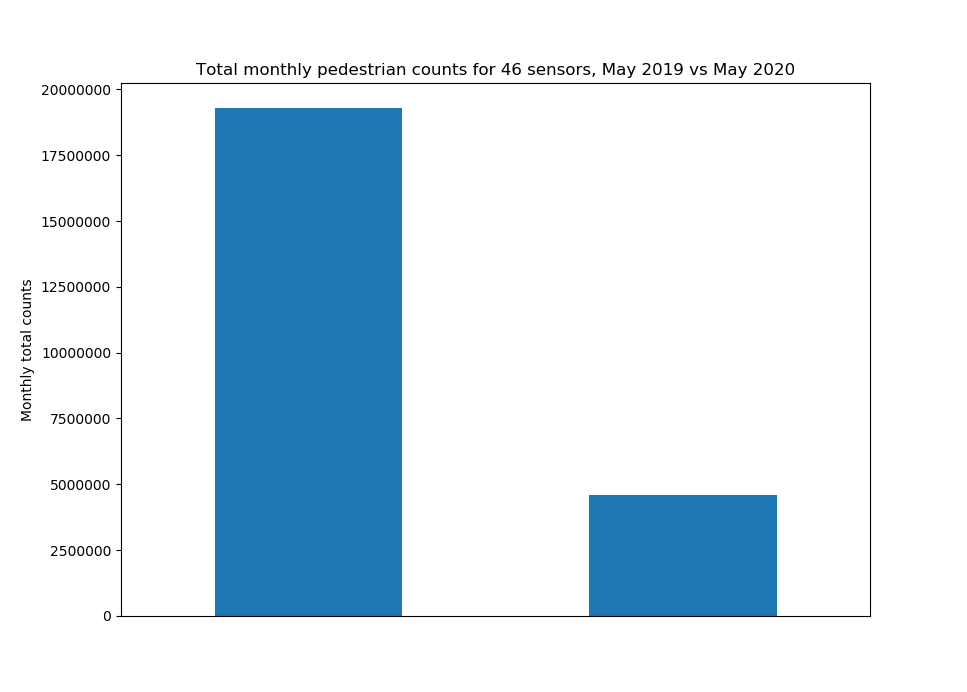

The total count for May 2019 is 19280331, the total count for May 2020 is 4586894
The number of pedestrian has been reduced by 76.2%


In [12]:
# Creating total counts for May 2019 and June 2019



groupped_by_date_time[["Total hourly counts (2019)","Total hourly counts (2020)"]].sum().plot.bar()



# remove the scientific notation on y axis 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


plt.title("Total monthly pedestrian counts for 46 sensors, May 2019 vs May 2020")



plt.xticks([])
#plt.xticks(rotation=0)

plt.ylabel("Monthly total counts")



plt.show()

print("The total count for May 2019 is 19280331, the total count for May 2020 is 4586894")
print("The number of pedestrian has been reduced by 76.2%")

In [ ]:
#--------------------------------------------------------
# prepare the line chart for total counts by time period 


In [54]:
# cutting sensor data into bins
hour_bins = [-1, 6.9, 10.9, 14.9, 18.9, 23.9]
hour_label = ["7am earier","Morning Peak: 7am-10am","11am-14pm","Afternoon Peak:15pm-18pm", "19pm-midnight"]

merged_clean_data["Time period"] = pd.cut(merged_clean_data["Time"], hour_bins, labels = hour_label)

merged_clean_data.head(50)

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period
0,1,1,0,96,9,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
1,1,1,1,71,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
2,1,1,2,30,2,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
3,1,1,3,8,5,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
4,1,1,4,19,4,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
5,1,1,5,42,12,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
6,1,1,6,105,47,Wednesday,Friday,May,Bourke Street Mall (North),7am earier
7,1,1,7,386,56,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am
8,1,1,8,1014,139,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am
9,1,1,9,1084,243,Wednesday,Friday,May,Bourke Street Mall (North),Morning Peak: 7am-10am


In [55]:
# Exporting merged data to csv
merged_clean_data.to_csv("output/merged_clean_data.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


In [56]:
# group by period and sum by binned total counts for May 2019

May2019_count_by_period = merged_clean_data.groupby(["Time period"])["Hourly counts (2019)"].sum().to_frame(name = "Total count 2019").reset_index()

May2019_count_by_period.head(50)

,Time period,Total count 2019
0,7am earier,696990
1,Morning Peak: 7am-10am,3684578
2,11am-14pm,5537238
3,Afternoon Peak:15pm-18pm,6306970
4,19pm-midnight,3054555


In [57]:
# group by period and sum by binned total counts for May 2020

In [58]:
May2020_count_by_period = merged_clean_data.groupby(["Time period"])["Hourly counts (2020)"].sum().to_frame(name = "Total count 2020").reset_index()

May2020_count_by_period.head(50)

,Time period,Total count 2020
0,7am earier,189529
1,Morning Peak: 7am-10am,742654
2,11am-14pm,1650816
3,Afternoon Peak:15pm-18pm,1520567
4,19pm-midnight,483328


In [59]:
# merge above dataframes to produce line chart 
count_by_period_merged  = pd.merge(left=May2019_count_by_period, right=May2020_count_by_period, on=["Time period"], how='inner')
count_by_period_merged.head()     

,Time period,Total count 2019,Total count 2020
0,7am earier,696990,189529
1,Morning Peak: 7am-10am,3684578,742654
2,11am-14pm,5537238,1650816
3,Afternoon Peak:15pm-18pm,6306970,1520567
4,19pm-midnight,3054555,483328


In [60]:
# to csv
count_by_period_merged.to_csv("output/count_by_period_merged.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


<IPython.core.display.Javascript object>


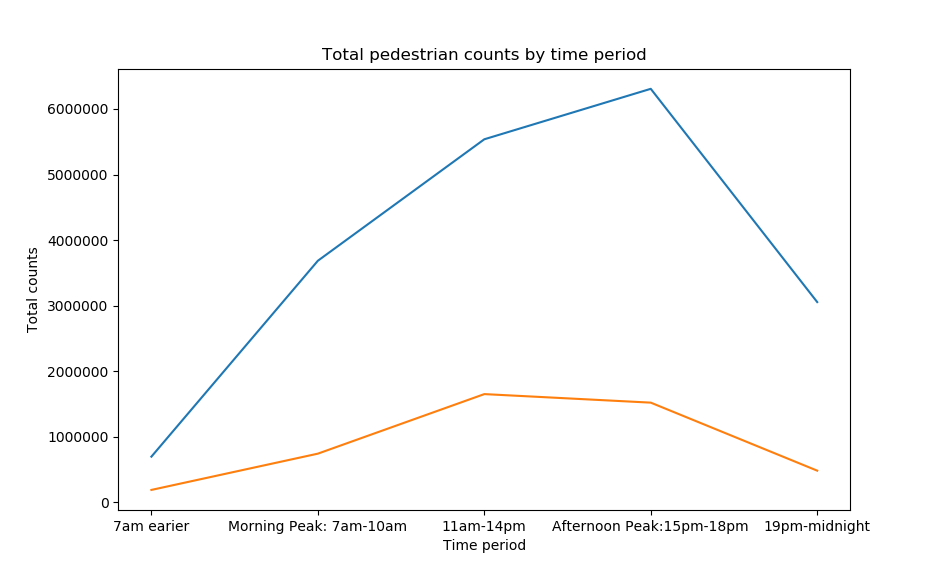

In [69]:
# Plot the count by period to line 
plt.plot(count_by_period_merged["Time period"], count_by_period_merged["Total count 2019"])
plt.plot(count_by_period_merged["Time period"], count_by_period_merged["Total count 2020"])
plt.title("Total pedestrian counts by time period")
plt.xlabel("Time period")
plt.ylabel("Total counts")
plt.show()


In [ ]:
#--------------------------------------------------------
# prepare the pie chart for total counts by week

In [17]:
# cutting sensor data into bins
week_bins = [0, 7, 14, 21, 33]
week_label = ["1st week","2nd week","3rd week","4th week"]

merged_clean_data["Week"] = pd.cut(merged_clean_data["Date"], week_bins, labels = week_label)

merged_clean_data.sample(50)


,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period,Week
2994,6,1,18,2820,320,Wednesday,Friday,May,Flinders Street Station Underpass,Afternoon Peak:15pm-18pm,1st week
25782,46,21,6,33,21,Tuesday,Thursday,May,Pelham St (South),7am earier,3rd week
22220,37,27,20,155,50,Monday,Wednesday,May,Lygon St (East),19pm-midnight,4th week
4048,7,14,16,338,261,Tuesday,Thursday,May,Birrarung Marr,Afternoon Peak:15pm-18pm,2nd week
13656,22,12,0,838,28,Sunday,Tuesday,May,Flinders St-Elizabeth St (East),7am earier,2nd week
11286,19,6,6,56,3,Monday,Wednesday,May,Chinatown-Swanston St (North),7am earier,1st week
11261,19,5,5,41,4,Sunday,Tuesday,May,Chinatown-Swanston St (North),7am earier,1st week
31099,53,25,19,403,91,Saturday,Monday,May,Collins St (North),19pm-midnight,4th week
24666,44,5,18,119,44,Sunday,Tuesday,May,Tin Alley-Swanston St (West),Afternoon Peak:15pm-18pm,1st week
12323,20,18,11,462,84,Saturday,Monday,May,Chinatown-Lt Bourke St (South),11am-14pm,3rd week


In [19]:
# to csv
merged_clean_data.to_csv("output/merged_clean_data.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


In [23]:
# sum weekly total for 2019
May2019_count_by_week = merged_clean_data.groupby(["Week"])["Hourly counts (2019)"].sum().to_frame(name = "Total weekly count 2019").reset_index()
May2019_count_by_week.head()

,Week,Total weekly count 2019
0,1st week,4449888
1,2nd week,4205944
2,3rd week,4441959
3,4th week,6182540


In [24]:
# sum weekly total for 2020
May2020_count_by_week = merged_clean_data.groupby(["Week"])["Hourly counts (2020)"].sum().to_frame(name = "Total weekly count 2020").reset_index()
May2020_count_by_week.head()

,Week,Total weekly count 2020
0,1st week,852497
1,2nd week,943340
2,3rd week,1084064
3,4th week,1706993


In [25]:
# merge above dataframes
count_by_week_merged  = pd.merge(left=May2019_count_by_week, right=May2020_count_by_week, on=["Week"], how='inner')
count_by_week_merged.head()     

,Week,Total weekly count 2019,Total weekly count 2020
0,1st week,4449888,852497
1,2nd week,4205944,943340
2,3rd week,4441959,1084064
3,4th week,6182540,1706993


In [26]:
# to csv
count_by_week_merged.to_csv("output/count_by_week_merged.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


<IPython.core.display.Javascript object>


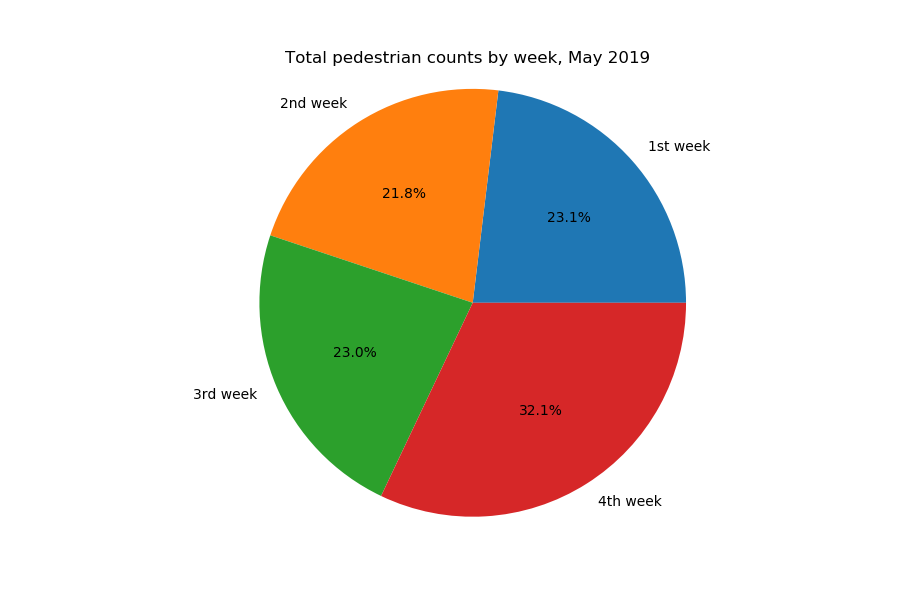

In [28]:
# create pie chart for 2019
weekly_count_2019 = count_by_week_merged["Total weekly count 2019"]
weekly_count_2019_labels = count_by_week_merged["Week"]
plt.pie(weekly_count_2019,labels=weekly_count_2019_labels,autopct='%1.1f%%')
plt.title('Total pedestrian counts by week, May 2019 ')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


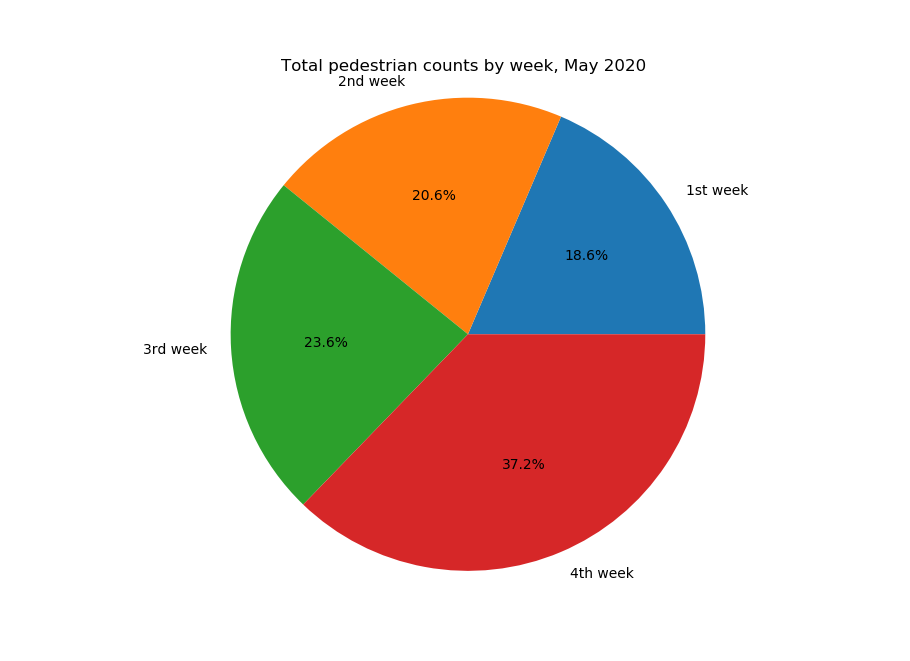

conclusion:
less people choose to walk in the city for the first two weeks, but more people in the city for the last week
probably people only go to city when they need to - at the end of the month


In [30]:
# create pie chart for 2020
weekly_count_2020 = count_by_week_merged["Total weekly count 2020"]
weekly_count_2020_labels = count_by_week_merged["Week"]
plt.pie(weekly_count_2020,labels=weekly_count_2020_labels,autopct='%1.1f%%')
plt.title('Total pedestrian counts by week, May 2020 ')
plt.axis('equal')
plt.show()

# conclusion:
# less people choose to walk in the city for the first two weeks, but more people in the city for the last week,
# probably people only go to city when they need to - at the end of the month 

print("conclusion:")
print("less people choose to walk in the city for the first two weeks, but more people in the city for the last week")
print("probably people only go to city when they need to - at the end of the month")

<IPython.core.display.Javascript object>


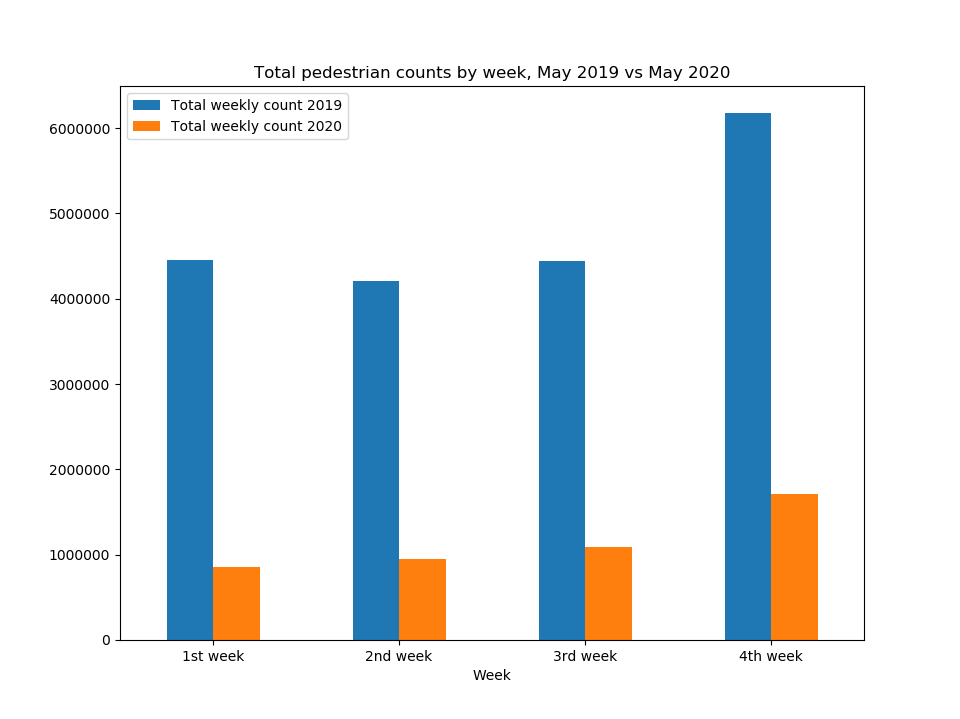

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

In [33]:
# using the weekly total count data, create a bar char to compare 
count_by_week_merged.plot(x="Week", y=["Total weekly count 2019", "Total weekly count 2020"], kind="bar") 
plt.title('Total pedestrian counts by week, May 2019 vs May 2020')
plt.xticks(rotation=0)


In [273]:
#-------------------------------------------------------
# Final part is for the top five significant changed sensors on a heat map
# To start with, don't worry about Lat/Long ntil we have the final statistic table 

In [293]:
# data structure 
merged_clean_data.sample(50)

,Sensor ID,Date,Time,Hourly counts (2019),Hourly counts (2020),Day (2019),Day (2020),Month,Sensor name,Time period,Week
9952,17,12,16,244,163,Sunday,Tuesday,May,Collins Place (South),Afternoon Peak:15pm-18pm,2nd week
21680,37,5,8,41,48,Sunday,Tuesday,May,Lygon St (East),Morning Peak: 7am-10am,1st week
8443,14,11,19,519,77,Saturday,Monday,May,Sandridge Bridge,19pm-midnight,2nd week
13017,21,16,9,364,39,Thursday,Saturday,May,Bourke St-Russell St (West),Morning Peak: 7am-10am,3rd week
13319,21,28,23,231,50,Tuesday,Thursday,May,Bourke St-Russell St (West),19pm-midnight,4th week
19436,34,4,20,113,4,Saturday,Monday,May,Flinders St-Spark La,19pm-midnight,1st week
33482,58,1,2,43,9,Wednesday,Friday,May,Bourke St - Spencer St (North),7am earier,1st week
25139,44,25,11,96,40,Saturday,Monday,May,Tin Alley-Swanston St (West),11am-14pm,4th week
28860,50,25,12,582,306,Saturday,Monday,May,Faraday St-Lygon St (West),11am-14pm,4th week
9774,17,5,6,33,91,Sunday,Tuesday,May,Collins Place (South),7am earier,1st week


In [294]:
# group by sensor id and sum total count for 2019
May2019_count_by_sensor = merged_clean_data.groupby(["Sensor ID","Sensor name"])["Hourly counts (2019)"].sum().to_frame(name = "Total count 2019 by sensor").reset_index()
May2019_count_by_sensor.head(50)

,Sensor ID,Sensor name,Total count 2019 by sensor
0,1,Bourke Street Mall (North),979720
1,2,Bourke Street Mall (South),649206
2,4,Town Hall (West),1008211
3,5,Princes Bridge,958937
4,6,Flinders Street Station Underpass,1040433
5,7,Birrarung Marr,191541
6,8,Webb Bridge,153803
7,9,Southern Cross Station,661180
8,10,Victoria Point,155687
9,11,Waterfront City,33525


In [295]:
# group by sensor id and sum total count for 2020
May2020_count_by_sensor = merged_clean_data.groupby(["Sensor ID"])["Hourly counts (2020)"].sum().to_frame(name = "Total count 2020 by sensor").reset_index()
May2020_count_by_sensor.head(50)

,Sensor ID,Total count 2020 by sensor
0,1,269797
1,2,166652
2,4,245937
3,5,156405
4,6,190959
5,7,79674
6,8,86192
7,9,66977
8,10,22824
9,11,27802


In [296]:
# merge above dataframes
count_by_sensor_merged = pd.merge(left=May2019_count_by_sensor, right=May2020_count_by_sensor, on=["Sensor ID"], how='inner')
count_by_sensor_merged.head(50)    

,Sensor ID,Sensor name,Total count 2019 by sensor,Total count 2020 by sensor
0,1,Bourke Street Mall (North),979720,269797
1,2,Bourke Street Mall (South),649206,166652
2,4,Town Hall (West),1008211,245937
3,5,Princes Bridge,958937,156405
4,6,Flinders Street Station Underpass,1040433,190959
5,7,Birrarung Marr,191541,79674
6,8,Webb Bridge,153803,86192
7,9,Southern Cross Station,661180,66977
8,10,Victoria Point,155687,22824
9,11,Waterfront City,33525,27802


In [297]:
# find the change

count_by_sensor_merged["Change in count"] = count_by_sensor_merged["Total count 2020 by sensor"] - count_by_sensor_merged["Total count 2019 by sensor"]





count_by_sensor_merged.head()

,Sensor ID,Sensor name,Total count 2019 by sensor,Total count 2020 by sensor,Change in count
0,1,Bourke Street Mall (North),979720,269797,-709923
1,2,Bourke Street Mall (South),649206,166652,-482554
2,4,Town Hall (West),1008211,245937,-762274
3,5,Princes Bridge,958937,156405,-802532
4,6,Flinders Street Station Underpass,1040433,190959,-849474


In [298]:
# sort the table by change, and keep the sorting
count_by_sensor_merged = count_by_sensor_merged.sort_values("Change in count")
count_by_sensor_merged.set_index("Sensor ID")
count_by_sensor_merged.head()

,Sensor ID,Sensor name,Total count 2019 by sensor,Total count 2020 by sensor,Change in count
18,22,Flinders St-Elizabeth St (East),1337425,445791,-891634
20,24,Spencer St-Collins St (North),1098166,210379,-887787
4,6,Flinders Street Station Underpass,1040433,190959,-849474
3,5,Princes Bridge,958937,156405,-802532
2,4,Town Hall (West),1008211,245937,-762274


In [299]:
# export the most five changed sensor
top_5_changed_sensors = count_by_sensor_merged.head(5)
# to csv
top_5_changed_sensors.to_csv("output/top_5_changed_sensors.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


In [300]:
# now we have the final change table, it is time to get the lat/long for the sensors 


sensor_url = "https://data.melbourne.vic.gov.au/resource/h57g-5234.json"

test_sensor_response = requests.get(sensor_url).json() 

# Discover the format of the response, 
test_sensor_response

# again, the response is a list of dictionaries

[{'sensor_id': '59',
  'sensor_description': 'Building 80 RMIT',
  'sensor_name': 'RMIT_T',
  'installation_date': '2019-02-13T00:00:00.000',
  'status': 'A',
  'direction_1': 'North',
  'direction_2': 'South',
  'latitude': '-37.80825648',
  'longitude': '144.96304859',
  'location': {'latitude': '-37.80825648',
   'longitude': '144.96304859',
   'human_address': '{"address": "", "city": "", "state": "", "zip": ""}'}},
 {'sensor_id': '23',
  'sensor_description': 'Spencer St-Collins St (South)',
  'sensor_name': 'Col623_T',
  'installation_date': '2013-09-02T00:00:00.000',
  'status': 'A',
  'direction_1': 'East',
  'direction_2': 'West',
  'latitude': '-37.81909256',
  'longitude': '144.95452749',
  'location': {'latitude': '-37.81909256',
   'longitude': '144.95452749',
   'human_address': '{"address": "", "city": "", "state": "", "zip": ""}'}},
 {'sensor_id': '20',
  'sensor_description': 'Chinatown-Lt Bourke St (South)',
  'sensor_name': 'LtB170_T',
  'installation_date': '2013-09

In [301]:
# this is the sensor list we need to call API
sensorID_list = [22,24,6,5,4]

# create empty list to store lat/long
sensorID = list()
Lat = list()
Long = list()

In [302]:
for sensor in sensorID_list: # we just need to call the top five changed sensor in the list  
    
    print("Processing sensor id "+ str(sensor) )
    query_sensor_url = sensor_url + "?sensor_id=" +str(sensor)
    sensor_response = requests.get(query_sensor_url).json()
    
    # the response is a list of a single dictionary, we still need to use index to access the element
    # list, list, list remember it is a list 
    sensorID.append(sensor_response[0]["sensor_id"])
    Lat.append(sensor_response[0]["latitude"])
    Long.append(sensor_response[0]["longitude"])
  

print("Finished processing sensors location")     

Processing sensor id 22
Processing sensor id 24
Processing sensor id 6
Processing sensor id 5
Processing sensor id 4
Finished processing sensors location


In [303]:
# adding sensor location data to a dataframe 
sensor_location = pd.DataFrame({
                "Sensor ID" : sensorID,
                "Latitude" : Lat,
                "Longitude": Long,                             
})

sensor_location.head()

#sensor_location.set_index("Sensor ID")

,Sensor ID,Latitude,Longitude
0,22,-37.81786445,144.96506823
1,24,-37.81887962,144.95449198
2,6,-37.81911704,144.96558256
3,5,-37.81874249,144.96787656
4,4,-37.81487988,144.9660878


In [304]:
# to csv

sensor_location.to_csv("output/sensor_location.csv", index = False)
print("Exported dataframe to csv!")

Exported dataframe to csv!


In [305]:
# join total change count with the sensor location, getting ready to the head map

# be aware of the fact that the sensor ids from the json response are test, while the sensor ids from top 5 changed sensors are integers
# need to cast all content from top_5_changed_sensors to string then to the join

top_5_changed_sensors = pd.merge(top_5_changed_sensors.astype(str),sensor_location, on=["Sensor ID"], how='left')

top_5_changed_sensors.reset_index()



# convert data to their corrent format

top_5_changed_sensors["Change in count"] = top_5_changed_sensors["Change in count"].astype(int)
top_5_changed_sensors["Latitude"] = top_5_changed_sensors["Latitude"].astype(float)
top_5_changed_sensors["Longitude"] = top_5_changed_sensors["Longitude"].astype(float)


top_5_changed_sensors

,Sensor ID,Sensor name,Total count 2019 by sensor,Total count 2020 by sensor,Change in count,Latitude,Longitude
0,22,Flinders St-Elizabeth St (East),1337425,445791,-891634,-37.817864,144.965068
1,24,Spencer St-Collins St (North),1098166,210379,-887787,-37.818880,144.954492
2,6,Flinders Street Station Underpass,1040433,190959,-849474,-37.819117,144.965583
3,5,Princes Bridge,958937,156405,-802532,-37.818742,144.967877
4,4,Town Hall (West),1008211,245937,-762274,-37.814880,144.966088


In [306]:
# to csv
top_5_changed_sensors.to_csv("output/top_5_changed_sensors.csv", index = False)
print("Exported dataframe to csv!")


Exported dataframe to csv!


In [ ]:
# finally for the heat map!
#-------------------------------------
